<a href="https://colab.research.google.com/github/amokshina/ii/blob/main/Lab01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Лабораторная  работа №1**
**Название**: Обучение модели линейной регрессии для решения задачи регрессии. Подбор гиперпараметров.

**Цель**: Освоение навыков решения задачи регрессии с использованием модели линейной регрессии и подбора гиперпараметров на примере параметра $\alpha$ регуляризации Ridge.



In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Датасет **Boston Housing** – это набор данных, который часто используется в области машинного обучения для изучения цен на недвижимость в разных районах Бостона. Этот датасет часто используется для задач регрессии, где цель состоит в предсказании медианной стоимости жилья на основе характеристик районов. Изучение этого набора данных помогает понять, как различные факторы могут влиять на стоимость недвижимости в разных районах и использовать эти знания для прогнозирования цен на жилье.  

Загрузка датасета **Boston Housing**:

In [ ]:
df = pd.read_csv(
    filepath_or_buffer="http://lib.stat.cmu.edu/datasets/boston", # URL для загрузки данных
    delim_whitespace=True, # Файл разделен пробелами
    skiprows=21, # Пропуск 21 первых строки файла
    header=None, # Файл не содержит строки заголовка
)

# Список названий столбцов для дальнейшего использования
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',
           'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

# Объединение всех значений в один список и удаление пустых значений
values_w_nulls = df.values.flatten() # Сплющивание значений в одномерный массив
all_values = values_w_nulls[~np.isnan(values_w_nulls)] # Удаление пустых значений (NaN)

# Преобразование значений в формат таблицы с 14 столбцами и создание нового DataFrame
df_housing = pd.DataFrame(
    data = all_values.reshape(-1, len(columns)), # Преобразование в двумерный массив с количеством столбцов, равным количеству признаков
    columns = columns, # Установка названий столбцов
)
# df_housing содержит окончательный DataFrame с данными о жилье в Бостоне
df_housing

<ipython-input-2-c67d9fb32dd0>:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


Колонки в датасете Boston Housing описывают различные характеристики районов в городе Бостон, связанные с ценами на жилье:
> * **CRIM**: Per capita crime rate by town (уровень преступности на душу населения в разбивке по городам)
* **ZN**: Proportion of residential land zoned for lots over 25,000 sq. ft (Доля земель под жилую застройку, разделенных на участки площадью более 25 000 кв. футов)
* **INDUS**: Proportion of non-retail business acres per town (Доля акров, не связанных с розничной торговлей, в городе)
* **CHAS**: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) (= 1, если участок граничит с рекой; 0 в противном случае).
* **NOX**: Nitric oxide concentration (parts per 10 million) (Концентрация оксида азота (частей на 10 миллионов))
* **RM**: Average number of rooms per dwelling (Среднее количество комнат в доме)
* **AGE**: Proportion of owner-occupied units built prior to 1940 (Доля жилых помещений, построенных владельцами до 1940 года)
* **DIS**: Weighted distances to five Boston employment centers (Взвешенные расстояния до пяти бостонских центров занятости)
* **RAD**: Index of accessibility to radial highways (Индекс доступности радиальных автомагистралей)
* **TAX**: Full-value property tax rate per \$10,000 (Полная ставка налога на недвижимость на 10 000 долларов США)
* **PTRATIO**: Pupil-teacher ratio by town  (соотношение учащихся и учителей в разбивке по городам)
* **B**: $1000(Bk — 0.63)²$, where $Bk$ is the proportion of [ *people of African American descent* ] by town
* **LSTAT**: Percentage of lower status of the population (Процент населения с низким статусом)
* **MEDV**: Median value of owner-occupied homes in $1000s (Средняя стоимость домов, занимаемых владельцами, в 1000 долларов)

Целевое значение для рассматриваемого датасета - **MEDV**

## **1. Предварительный анализ и визуализация данных**

Выполните проверку наличия NaN-значений в датасете.

In [ ]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


Постройте гистограмму для целевого значения датасета (**MEDV**).

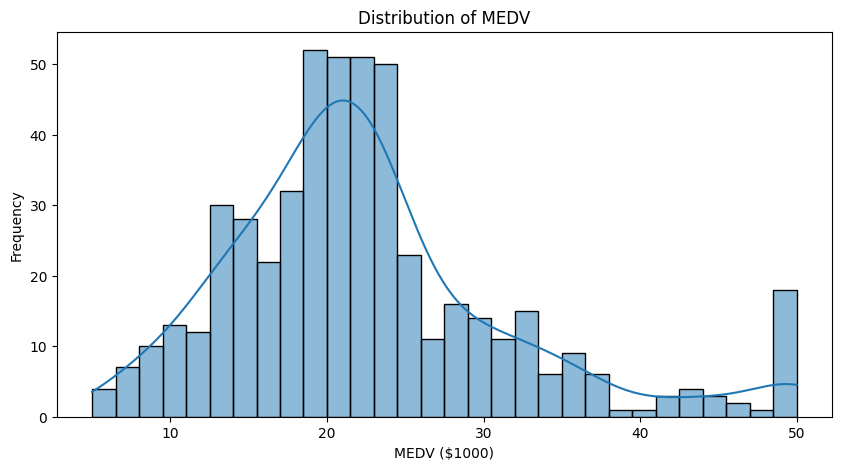

In [ ]:
# Построение гистограммы
plt.figure(figsize=(10, 5))
sns.histplot(df_housing['MEDV'], kde=True, bins=30)
plt.xlabel('MEDV ($1000)')
plt.ylabel('Frequency')
plt.title('Distribution of MEDV')
plt.show()

Сделайте выводы о распределении **MEDV**.

In [ ]:
from scipy.stats import skew, kurtosis

skewness = skew(df_housing['MEDV'])
kurt = kurtosis(df_housing['MEDV'])

print(f"Асимметрия (Skewness) MEDV: {skewness}")
print(f"Эксцесс (Kurtosis) MEDV: {kurt}")

Асимметрия (Skewness) MEDV: 1.104810822864635
Эксцесс (Kurtosis) MEDV: 1.4686287722747462


In [ ]:
mean_medv = df_housing['MEDV'].mean()
median_medv = df_housing['MEDV'].median()
std_medv = df_housing['MEDV'].std()
iqr_medv = df_housing['MEDV'].quantile(0.75) - df_housing['MEDV'].quantile(0.25)

print(f"Среднее значение MEDV: {mean_medv}")
print(f"Медиана MEDV: {median_medv}")
print(f"Стандартное отклонение MEDV: {std_medv}")
print(f"IQR (интерквартильный размах) MEDV: {iqr_medv}")


Среднее значение MEDV: 22.532806324110677
Медиана MEDV: 21.2
Стандартное отклонение MEDV: 9.19710408737982
IQR (интерквартильный размах) MEDV: 7.975000000000001


In [ ]:
df_housing['MEDV'].describe()

,MEDV
count,506.000000
mean,22.532806
std,9.197104
min,5.000000
25%,17.025000
50%,21.200000
75%,25.000000
max,50.000000


**Выводы**:   
Распределение MEDV не является нормальным, имеет положительную асимметрию, а также выраженные хвосты. Среднее значение переменной выше чем медианное. Стандартное отклонение составляет 9.20, что говорит о значительном разбросе цен вокруг среднего значения. Интерквартильный размах (IQR) равен 7.98, что говорит о более концентрированном диапазоне значений для 50% данных (между первым и третьим квартилем). Это значит, что, несмотря на наличие высоких значений, большая часть данных сконцентрирована вокруг медианы.

Большинство домов лежит в среднем диапазоне цен, но есть отдельные дорогие районы, влияющие на распределение.

Выполните вычисление корреляционной матрицы (`.corr()`) и построение карты `heatmap` для всего датасета.

In [ ]:
corr_matrix = df_housing.corr(numeric_only=True)
corr_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<Axes: >

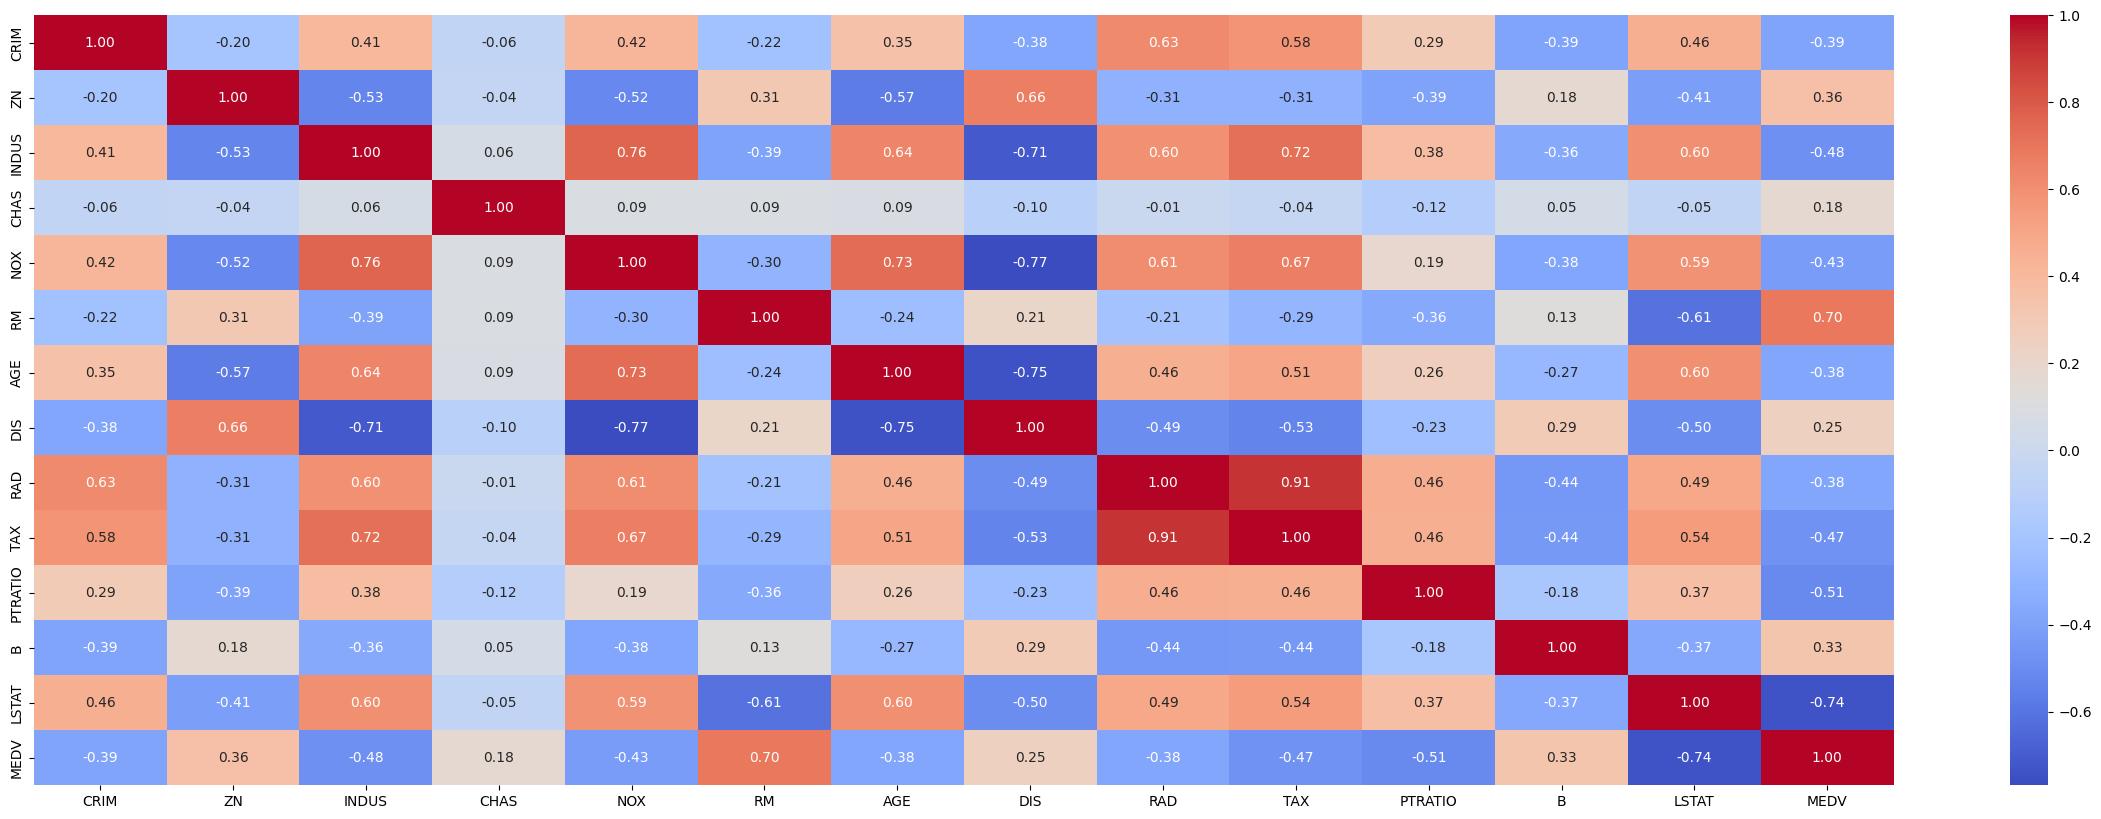

In [ ]:
plt.figure(figsize=(30,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")

**Отберем для обучения модели линейной регрессии признаки, оказывающие наибольшее влияние на целевое значение.**

Коэффициент корреляции варьируется от -1 до 1. Если значение близко к 1, это означает, что между двумя переменными существует сильная положительная корреляция. Когда оно близко к -1, переменные имеют сильную отрицательную корреляцию.

Найдите признаки, оказывающие наибольшее влияние на показатель **MEDV** (признаки, имеющие большой показатель корреляции (не важно, положительной или отрицательной) с MEDV).

> Под "большим" значением корреляции будем понимать значение, составившее более 0.5 по модулю.

In [ ]:
X = df_housing[['RM', 'PTRATIO', 'LSTAT']]
y = df_housing['MEDV']

Важным моментом при выборе признаков для модели линейной регрессии является **проверка на взаимную зависимость отобранных признаков**. Если наблюдается сильная взаимосвязь между отобранными признаки, для результирующего датасета имеет смысл взять только один из них.


Убедитесь, что корреляция между всеми парами отобранных признаков имеет значение менее 0.9 по модулю.

In [ ]:
X.corr()

,RM,PTRATIO,LSTAT
RM,1.000000,-0.355501,-0.613808
PTRATIO,-0.355501,1.000000,0.374044
LSTAT,-0.613808,0.374044,1.000000


Постройте **диаграммы рассеивания** `plt.scatter` для каждого из отобранных признаков для того, чтобы продемонстрировать взаимосвязь каждого из них и результирующего значения MEDV.
> Всего должно быть столько графиков, сколько признаков отобрано для обучения. Каждый график по горизонтали иллюстрирует значение признака, по вертикали - значение MEDV, точки на графике - наблюдения из датасета.

Text(0, 0.5, 'MEDV')

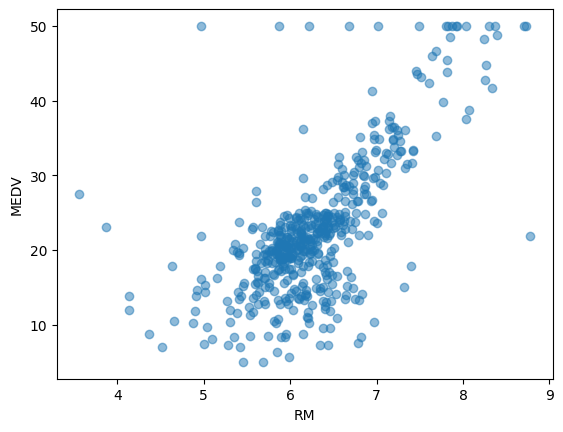

In [ ]:
plt.scatter(X['RM'], y, alpha=0.5)
plt.xlabel('RM')
plt.ylabel('MEDV')

Text(0, 0.5, 'MEDV')

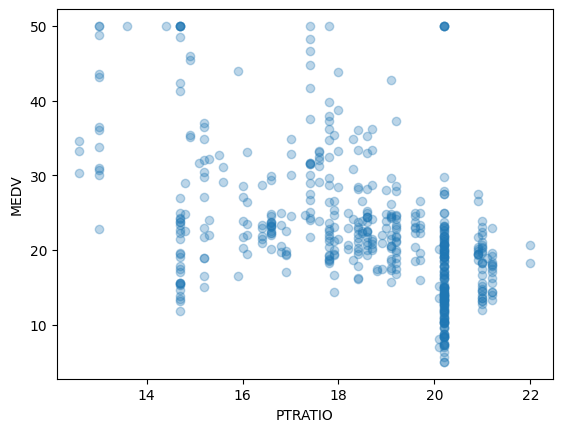

In [ ]:
plt.scatter(X['PTRATIO'], y, alpha=0.3)
plt.xlabel('PTRATIO')
plt.ylabel('MEDV')

Text(0, 0.5, 'MEDV')

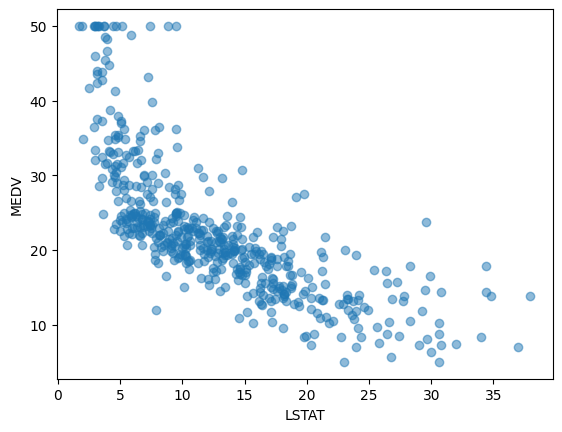

In [ ]:
plt.scatter(X['LSTAT'], y, alpha=0.5)
plt.xlabel('LSTAT')
plt.ylabel('MEDV')

По полученным визуализациям сделайте выводы о влиянии значений признаков на значение MEDV.

**Выводы**:   
На графике зависимости целевой переменной от RM (среднее количество комнат) наблюдается явная положительная зависимость, при увеличении числа комнат растет стоимость жилья. Также наблюдается некоторые аномальные, слишком дорогие значения стоимости жилья.

На графике зависимости целевой переменной от LSTAT (процент населения с низким статусом) наблюдается явная отрицательная зависимость. Чем выше процент населения с низким статусом, тем дешевле жилье. Большая часть данных сконцентрирована в части, где это значение не превышает 25. Самое дорогое жилье находится в районах, где процент населения с низким статусом не превышает 10.

На графике зависимости целевой переменной от PTRATIO (соотношение учащихся и учителей в разбивке по городам) мы не наблюдаем четкой зависимости. Это можно объяснить тем, что в предыдущих двух случаях корреляция между целевой переменной и признаком была 0.7 и -0.74, в то время как в нынешнем примере она составляет всего -0.51. Наиболее высокие значения стоимости жилья достигаются, когда показатель PTRATIO не превышает 20. PTRATIO может быть связан с ценностью и привлекательностью района. Районы с хорошими школами и низким соотношением учащихся к учителям часто более привлекательны для семей с детьми, что может повысить стоимость жилья в этих районах.

## **2. Обучение модели**

Разделите исходный датафрейм на датафреймы $X$ (**с выделенными на предыдущем этапе признаками**) и $y$ (с целевым значением).

In [ ]:
X = df_housing[['RM', 'PTRATIO', 'LSTAT']]
y = df_housing['MEDV']

Выполните разбиение на `train` и `test` в соотношении 80:20.
> Используйте `train_test_split` со значением `random_state=42`

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

Обучите модель линейной регрессии на данных для обучения.
> Используйте `LinearRegression`

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True) # fit_intercept=True означает, что модель добавит свободный член автоматически

model.fit(X_train, y_train)
y_pred = model.predict(X_train)

Выполните предсказания на **обучающем множестве** и оцените качество полученной модели по метрикам MSE, MAE и R^2.
> Функции для рассчета метрик можно взять из библиотеки `sklearn.metrics`

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_train, y_pred)
print("MSE:", mse)

mae = mean_absolute_error(y_train, y_pred)
print("MAE:", mae)

r2 = r2_score(y_train, y_pred)
print("Коэффицент детерминации:", r2)

MSE: 27.238577411646844
MAE: 3.6827974558296845
Коэффицент детерминации: 0.6864566575056517


Выполните предсказания на **тестовом множестве** и оцените качество полученной модели по метрикам MSE, MAE и R^2.
> Функции для рассчета метрик можно взять из библиотеки `sklearn.metrics`

In [ ]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

r2 = r2_score(y_test, y_pred)
print("Коэффицент детерминации:", r2)

MSE: 27.114957415580644
MAE: 3.33253807832409
Коэффицент детерминации: 0.6302528487272818


Выполните аналогичную оценку модели с использованием **кросс-валидации**.
* Аналогично найти значения параметров на обучающем и тестовом множестве.
* Использовать те же метрики - MSE, MAE и R^2.

> Использовать функцию `cross_validate` из библиотеки `sklearn.model_selection`.  
Несколько ключевых аргументов функции cross_validate:  
 **estimator**: Это модель, которую вы хотите оценить.  
> **X**: Матрица признаков.  
> **y**: Целевая переменная.  
**cv**: Количество фолдов (разбиений) в кросс-валидации (использовать значение 5).  
**scoring**: Список метрик для оценки модели.  
**return_train_score**: Если установлено на True, функция вернет результаты на обучающих данных (train_) и на тестовых данных (test_).  
Функция **cross_validate** возвращает словарь с результатами кросс-валидации для каждой метрики и каждого фолда, что позволяет оценить производительность модели на обучающих и тестовых данных в каждом фолде.  


> **Для получения итоговых показателей необходимо усреднить их по всем фолдам (`mean()`)**

[Документация на `cross_validate`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate)

In [ ]:
from sklearn.model_selection import cross_validate

cv_results = cross_validate(model, X, y, cv=5, scoring=['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2'], return_train_score=True)

In [ ]:
results_df = pd.DataFrame(cv_results)
results_df

,fit_time,score_time,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_r2,train_r2
0,0.005064,0.004341,-9.430129,-31.758068,-2.527320,-4.015893,0.726941,0.672626
1,0.002839,0.002780,-25.958496,-27.858946,-3.851764,-3.623233,0.714857,0.658832
2,0.002232,0.002653,-36.184188,-26.827797,-4.406617,-3.529961,0.548190,0.613837
3,0.002331,0.002741,-71.757967,-17.835168,-5.168328,-3.221588,0.181890,0.781589
4,0.002402,0.002826,-27.169628,-27.977118,-4.258776,-3.542897,-0.021863,0.674489


In [ ]:
mean_results = results_df.mean()  # Средние значения по всем фолдам
mean_results

,0
fit_time,0.002974
score_time,0.003068
test_neg_mean_squared_error,-34.100081
train_neg_mean_squared_error,-26.451420
test_neg_mean_absolute_error,-4.042561
train_neg_mean_absolute_error,-3.586714
test_r2,0.430003
train_r2,0.680275


Прокомментируйте полученные показатели модели. Чем обусловлена разница полученных значений?

**Выводы**:   
MSE, MAE и R^2 для тестового множества ниже, чем для обучающего. Результаты кросс-валидации показывают еще более низкие значения R^2 и более высокие значения ошибок (MSE и MAE) на тестовых данных по сравнению с обучающими.

Наблюдаемое различие между тренировочными и тестовыми метриками может свидетельствовать о переобучении модели. Высокая производительность на тренировочных данных и значительно хуже на тестовых — признак того, что модель может быть слишком сложной для имеющихся данных.

Возможны различия в распределении значений в обучающем и тестовом множествах. Например, если в тестовом множестве есть выбросы или нестандартные случаи, это может негативно повлиять на производительность модели.

## **Подбор гиперпараметров модели**

Для подбора гиперпараметров будем использовать модель `Ridge`, настраиваемый гиперпараметр - `alpha`.  

Механика подбора гиперпараметров:
* Определение диапазона значений настраиваемого параметра:  
`alphas = np.append([0.0], np.logspace(-2, 5, 20, base=10))`
* Обучение и тестирование модели на обучающем множестве (внутри которого определяется дополнительное валидирующее множество для оценки модели)
* Выбор в качестве итогового значения гиперпараметра того значения, использование которого дало наилучшие результаты работы модели

In [ ]:
# Определение диапазона значений настраиваемого параметра
alphas = np.append([0.0], np.logspace(-2, 5, 20, base=10))

`np.logspace(-2, 5, 20, base=10)` - Эта функция из библиотеки NumPy создает массив чисел в логарифмической шкале от 10^(-2) до 10^5 с равными интервалами.
  Параметры:

-2 - степень, от которой начинается создание чисел.  
5 - степень, до которой создаются числа.  
20 - количество чисел в массиве.  
base=10 - указывает на основание логарифма (в данном случае десятичный логарифм).

Для каждого из значений `alpha` из `alphas` вычислить значения метрик MSE и R2 модели на обучающем и валидационном множестве. Результаты поместить в датафрейм `df_general`:

In [ ]:
# Наименования столбцов для df_general
columns = ['MSE_train', 'MSE_val', 'R2_train', 'R2_val']
# Создание DataFrame df_general
df_general = pd.DataFrame(columns=columns)

# При добавлении значений использовать текущую alpha в качестве индекса: df_general.loc[alpha] = <Добавляемая строка>

Для настройки разбиения на фолды использовать `KFold` с параметрами `n_splits=5, shuffle=True, random_state=42`.

In [ ]:
# Для разбиения данных используем класс KFold
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

Для подбора модели использовать функцию `cross_validate`.

Использовать цикл по всем предполагаемым значениям `alpha`. На каждой итерации цикла формировать модель `Ridge` с текущим `alpha` и задавать ее в качестве параметра в функции `cross_validate`

```
scores = cross_validate(<модель>,
                        X_train, # для подбора модели
                        y_train, # используют обучающие данные
                        cv=kf,
                        scoring=<список метрик>,
                        return_train_score=True)
```

In [ ]:
from sklearn.linear_model import Ridge

for alpha in alphas:
  model = Ridge(alpha=alpha)

  scores = cross_validate(model,
                          X_train,
                          y_train,
                          cv=kf,
                          scoring=['neg_mean_squared_error', 'r2'],
                          return_train_score=True)

  # Сохранение результатов
  df_general.loc[alpha] = [
      scores['train_neg_mean_squared_error'].mean(),  # MSE на обучающем множестве
      scores['test_neg_mean_squared_error'].mean(),   # MSE на валидационном множестве
      scores['train_r2'].mean(),                        # R² на обучающем множестве
      scores['test_r2'].mean()                          # R² на валидационном множестве
  ]


Выведите содержимое датафрейма `df_general`

In [ ]:
df_general

,MSE_train,MSE_val,R2_train,R2_val
0.000000,-27.100493,-28.465693,0.687635,0.667756
0.010000,-27.100493,-28.465692,0.687635,0.667757
0.023357,-27.100493,-28.465693,0.687635,0.667758
0.054556,-27.100495,-28.465694,0.687635,0.667761
0.127427,-27.100505,-28.465702,0.687635,0.667767
0.297635,-27.100558,-28.465752,0.687634,0.667782
0.695193,-27.100847,-28.466031,0.687631,0.667815
1.623777,-27.102389,-28.467545,0.687613,0.667880
3.792690,-27.110400,-28.475455,0.687521,0.667975
8.858668,-27.149546,-28.514128,0.687071,0.667933


**Постройте графики зависимостей**:
* График зависимости MSE от коэффициента регуляризации для обучающего и проверочного подмножеств.  

```
ax.set_xscale('log')
plt.plot(df_general.index,
         df_general["MSE_train"], ...)

plt.plot(df_general.index,
         df_general["MSE_test"], ...)
```

* График зависимости R-квадрата от коэффициента регуляризации для обучающего и проверочного подмножеств.

```
ax.set_xscale('log')
plt.plot(df_general.index,
         df_general["R2_train"], ...)

plt.plot(df_general.index,
         df_general["R2_test"], ...)
```

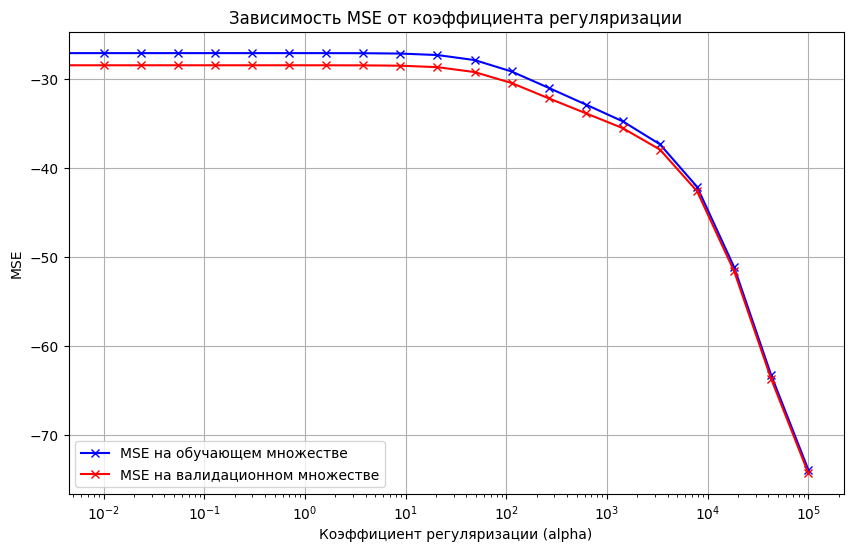

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(df_general.index,
         df_general["MSE_train"],
         marker='x', label='MSE на обучающем множестве', color='b')

plt.plot(df_general.index,
         df_general["MSE_val"],
         marker='x', label='MSE на валидационном множестве', color='r')

plt.xscale('log')

# Настройка меток и заголовка
plt.xlabel('Коэффициент регуляризации (alpha)')
plt.ylabel('MSE')
plt.title('Зависимость MSE от коэффициента регуляризации')
plt.legend()
plt.grid(True)

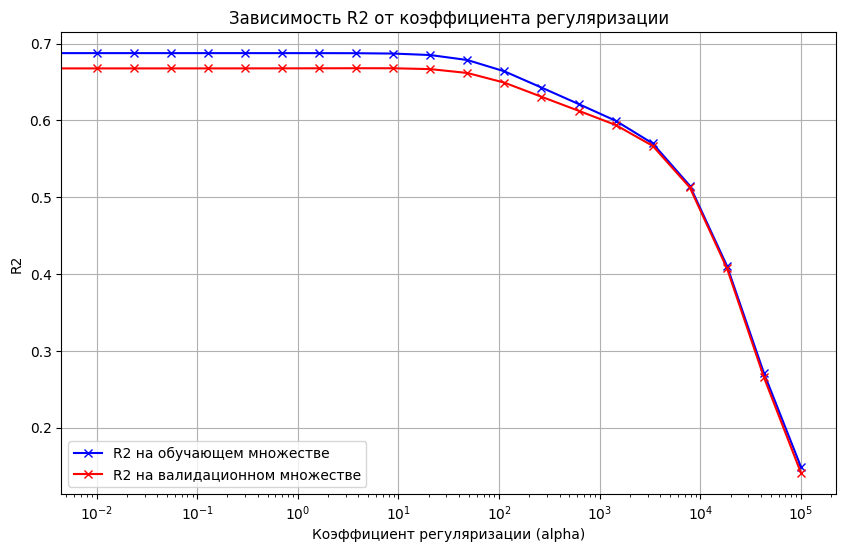

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(df_general.index,
         df_general["R2_train"],
         marker='x', label='R2 на обучающем множестве', color='b')

plt.plot(df_general.index,
         df_general["R2_val"],
         marker='x', label='R2 на валидационном множестве', color='r')

plt.xscale('log')

# Настройка меток и заголовка
plt.xlabel('Коэффициент регуляризации (alpha)')
plt.ylabel('R2')
plt.title('Зависимость R2 от коэффициента регуляризации')
plt.legend()
plt.grid(True)

Определите наилучший параметр `alpha` (минимум ошибки или максимум коэффициента детерминации на **валидационных множествах**)

In [ ]:
best_alpha_mse = abs(df_general['MSE_val']).idxmin()
best_mse_value = abs(df_general['MSE_val']).min()

print(f"Наилучший alpha по MSE: {best_alpha_mse}, MSE: {best_mse_value}")

best_alpha_r2 = df_general['R2_val'].idxmax()
best_r2_value = df_general['R2_val'].max()

print(f"Наилучший alpha по R²: {best_alpha_r2}, R²: {best_r2_value}")

Наилучший alpha по MSE: 0.01, MSE: 28.465692462990326
Наилучший alpha по R²: 3.79269019073225, R²: 0.6679752195682114


Обучите модель с наилучшим значением `alpha` на всем обучающем множестве.  
Выполните прогнозы на тестовом множестве.   
Получите итоговые показатели модели на тестовом множестве по метрикам MSE и R2.


In [ ]:
model = Ridge(alpha=best_alpha_r2)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

r2 = r2_score(y_test, y_pred)
print("Коэффицент детерминации:", r2)

MSE: 26.942553840786555
Коэффицент детерминации: 0.6326037921446858


Постройте графики `plt.scatter` для тестового множества данных (покажите на графике истинные целевые значения и целевые значения, предсказанные моделью).  
Построить по одному подобному графику для каждого из признаков, отобранных для обучения на этапе выбора признаков.

Text(0.5, 1.0, 'Сравнение истинных и предсказанных значений')

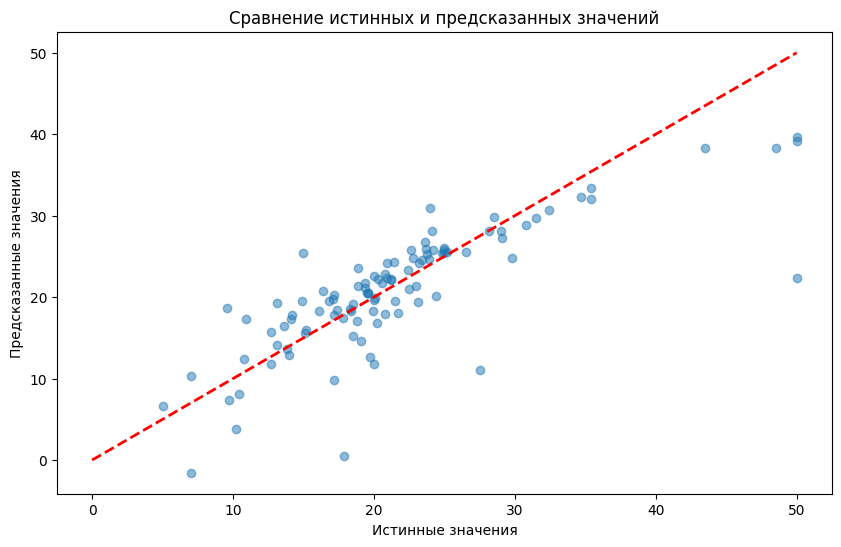

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([0, 50], [0, 50], 'r--', lw=2)  # Линия y=x
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.title('Сравнение истинных и предсказанных значений')

In [ ]:
mean_e = np.mean(y_test-y_pred)
print(f"Среднее значение остатков: {mean_e}")

Среднее значение остатков: 0.5861656672225031


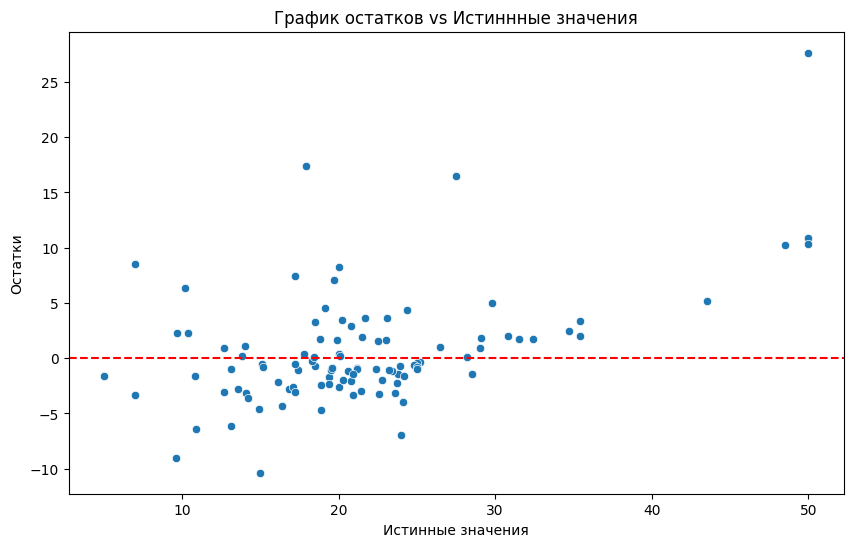

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=(y_test-y_pred))
plt.axhline(0, color='r', linestyle='--')
plt.title('График остатков vs Истиннные значения')
plt.xlabel('Истинные значения')
plt.ylabel('Остатки')
plt.show()

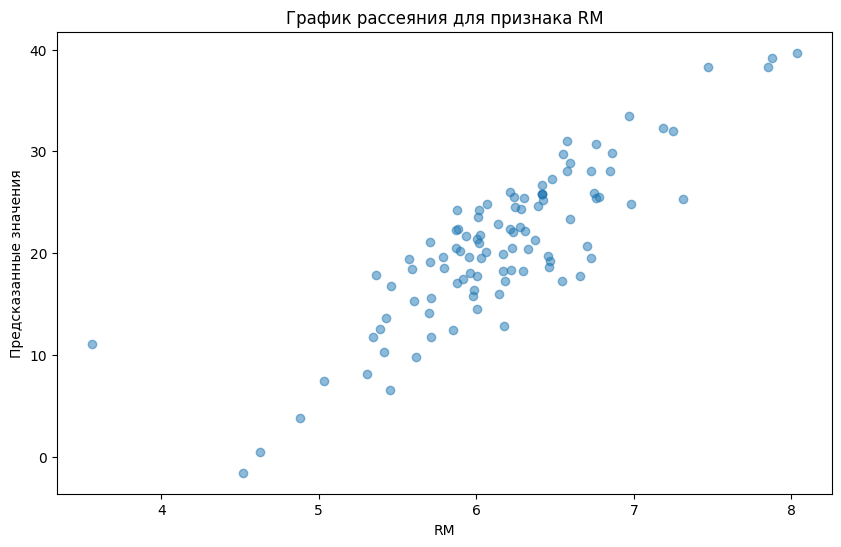

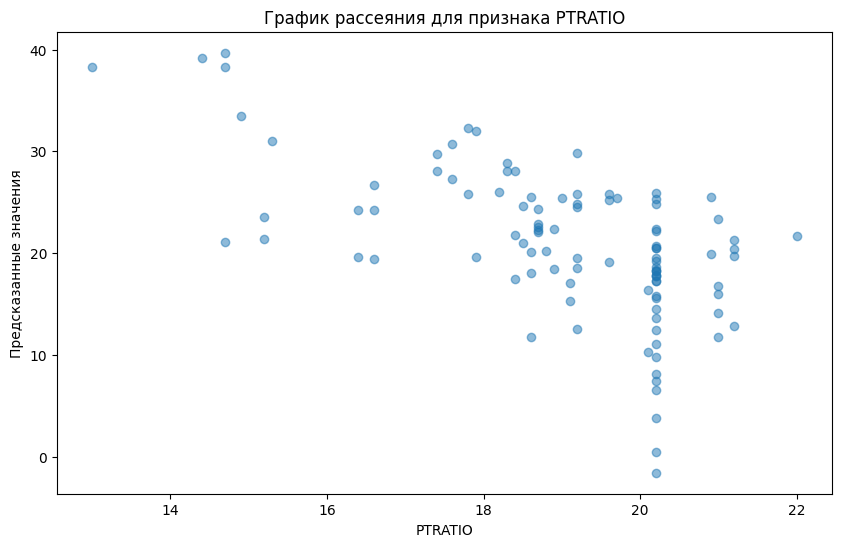

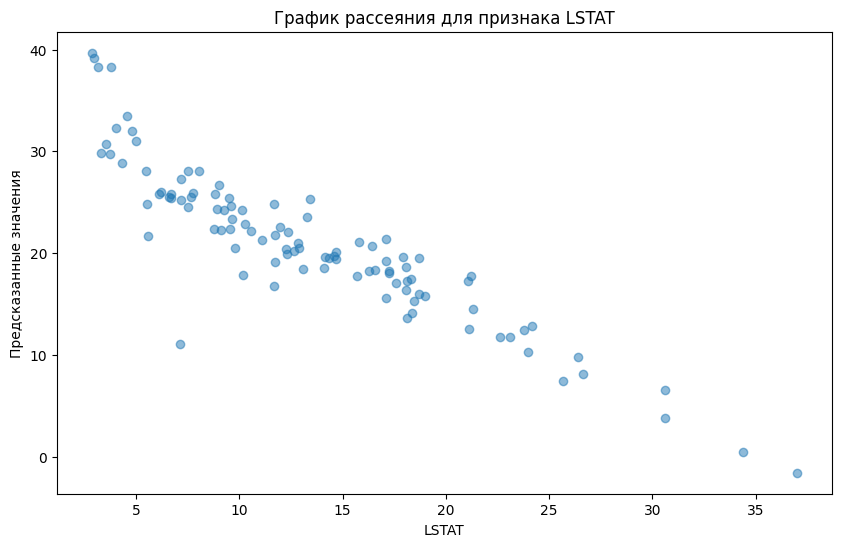

In [ ]:
# Построение графиков для каждого признака
for feature in X_test.columns:
    plt.figure(figsize=(10, 6))
    plt.scatter(X_test[feature], y_pred, alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel('Предсказанные значения')
    plt.title(f'График рассеяния для признака {feature}')
    plt.show()

Сделайте выводы по полученным показателям метрик и визуализациям работы итоговой модели.

**Выводы**:   

MSE равен 26.94. Это значение достаточно высокое, что может свидетельствовать о том, что модель имеет значительные ошибки в предсказаниях.

Коэффициент детерминации равен 0.63, что означает, что модель объясняет 63% вариации целевой переменной. Модель не является очень сильной, но и не совсем плохой.

На графике сравнения истинных и предсказанных значений можно заметить, что истинные большие значения плохо покрываются моделью.

Модель может хорошо работать на большинстве значений, но плохо предсказывать крайние (высокие или низкие) значения, что может быть связано с недостаточной представленностью этих значений в обучающей выборке.

Среднее значение остатков (0.586) близко к нулю, что обычно является хорошим знаком. Это означает, что в среднем предсказания модели не имеют систематической ошибки.

На графике остатков против истинных значений можем наблюдать, что остатки варьируются как вверх, так и вниз от нулевой линии, что является позитивным знаком. Однако наличие выбросов справа может указывать на то, что некоторые предсказания модели значительно отклоняются от фактических значений. Модель плохо охватывает группы домов по высокой цене.

На графиках рассеяния для RM и LSTAT наблюдается явная линейная зависимость. Большинство предсказанных значений лежат в допустимых пределах для прямой.

Отсутствие линейной зависимости на графике рассеяния для PTRATIO может указывать на то, что этот признак слабо коррелирует с целевой переменной. Это может означать, что данный признак не является значимым для модели.

